<a href="https://colab.research.google.com/github/rukayah/Data_Analysis_with_Volcano_Data/blob/main/Volcano_Eruption_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Science Fundamentals

## Sprint 1: Data Wrangling and Storytelling

Volcano Eruptions, once more!

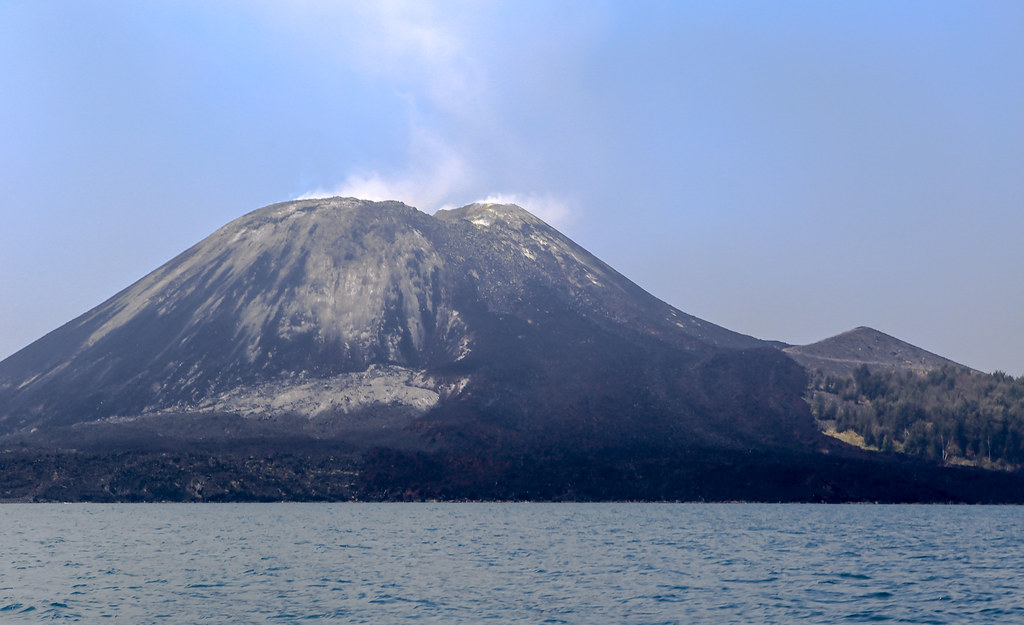

## Concepts to explore
You should explore calculating basic data statistical parameters, performing EDA.

## Requirements
*   Describe the data with basic statistical parameters - mean, median, quantiles...
*   Grouping the data and analyzing the groups - using Pandas aggregate methods
*   Work with features - handle missing data, use pandas date APIs.
*   Manipulate datasets - use joins.
*   Visualize the data - use line, scatter, histogram plots, density plots, regplots.
*   The data is available here, you can use any of the datasets from the repository.



# Solution

### Import libraries

In [1]:
#import Relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Read the datasets & Explore individually

In [2]:
eruption_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv')
volcano_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv')
event_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/events.csv')
sulfur_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/sulfur.csv')
tr_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/tree_rings.csv')


# Volcano Data

## Data Wrangling

In [3]:
#find the first 3 rows
volcano_data.head() 

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,...,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,...,,Dacite,,,,,0,70,4019,393303


In [4]:
# find the number of rows and columns
volcano_data.shape

(958, 26)

There are 958 rows and 26 columns in the volcano data

In [ ]:
#find data type of each column
volcano_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock

There seems to be no missing values

In [5]:
# confirm with isnull()
volcano_data.isnull().sum()  

volcano_number              0
volcano_name                0
primary_volcano_type        0
last_eruption_year          0
country                     0
region                      0
subregion                   0
latitude                    0
longitude                   0
elevation                   0
tectonic_settings           0
evidence_category           0
major_rock_1                0
major_rock_2                0
major_rock_3                0
major_rock_4                0
major_rock_5                0
minor_rock_1                0
minor_rock_2                0
minor_rock_3                0
minor_rock_4                0
minor_rock_5                0
population_within_5_km      0
population_within_10_km     0
population_within_30_km     0
population_within_100_km    0
dtype: int64

In [ ]:
#find the summary statistics using describe
volcano_data.describe().T

,count,mean,std,min,25%,50%,75%,max
volcano_number,958.0,2.985853e+05,4.979266e+04,210010.00,263025.00000,300055.5000,3.430880e+05,3.908290e+05
latitude,958.0,1.498468e+01,3.158498e+01,-78.50,-5.40150,14.5140,4.079825e+01,7.108200e+01
longitude,958.0,2.353747e+01,1.098526e+02,-179.97,-78.28275,36.3935,1.310455e+02,1.795800e+02
elevation,958.0,1.867027e+03,1.401546e+03,-2500.00,881.00000,1622.5000,2.548250e+03,6.879000e+03
population_within_5_km,958.0,4.786046e+04,2.986690e+05,0.00,0.00000,295.0000,4.642000e+03,5.783287e+06
population_within_10_km,958.0,6.121775e+04,3.023860e+05,0.00,23.25000,1633.5000,2.073025e+04,5.783287e+06
population_within_30_km,958.0,3.040444e+05,7.354221e+05,0.00,408.00000,13918.0000,2.565210e+05,7.073814e+06
population_within_100_km,958.0,2.730174e+06,5.690981e+06,0.00,11397.75000,354646.0000,2.981102e+06,4.064010e+07


In [7]:
#Convert all empty cell in the data to null value to represent actual missing value
volcano_data = volcano_data.replace(r'^\s*$', np.nan, regex=True) 

In [8]:
# we need to check again for actual missing values
volcano_data.isnull().sum()

volcano_number                0
volcano_name                  0
primary_volcano_type          0
last_eruption_year            0
country                       0
region                        0
subregion                     0
latitude                      0
longitude                     0
elevation                     0
tectonic_settings             0
evidence_category             0
major_rock_1                  0
major_rock_2                256
major_rock_3                642
major_rock_4                833
major_rock_5                917
minor_rock_1                734
minor_rock_2                871
minor_rock_3                930
minor_rock_4                956
minor_rock_5                958
population_within_5_km        0
population_within_10_km       0
population_within_30_km       0
population_within_100_km      0
dtype: int64

There are missing values in the data.

Examine the columns individually in the volcano data

In [9]:
#select object type
volcano_data.select_dtypes('object').columns 

Index(['volcano_name', 'primary_volcano_type', 'last_eruption_year', 'country',
       'region', 'subregion', 'tectonic_settings', 'evidence_category',
       'major_rock_1', 'major_rock_2', 'major_rock_3', 'major_rock_4',
       'major_rock_5', 'minor_rock_1', 'minor_rock_2', 'minor_rock_3',
       'minor_rock_4', 'minor_rock_5'],
      dtype='object')

In [10]:
# find unique value for each of the object column
print(volcano_data['primary_volcano_type'].unique())
print(volcano_data['country'].unique())
print(volcano_data['region'].unique())
print(volcano_data['tectonic_settings'].unique())
print(volcano_data['evidence_category'].unique())
print(volcano_data['subregion'].unique())
print(volcano_data['major_rock_1'].unique())

['Shield(s)' 'Stratovolcano' 'Stratovolcano(es)' 'Caldera' 'Submarine'
 'Shield' 'Volcanic field' 'Fissure vent(s)' 'Compound' 'Complex'
 'Pyroclastic shield' 'Pyroclastic cone(s)' 'Pyroclastic cone'
 'Caldera(s)' 'Lava dome(s)' 'Lava cone' 'Crater rows' 'Maar(s)'
 'Tuff cone(s)' 'Complex(es)' 'Subglacial' 'Lava dome' 'Lava cone(s)'
 'Tuff cone' 'Lava cone(es)' 'Stratovolcano?']
['Japan' 'Chile' 'Guatemala' 'Turkey' 'United States' 'Ethiopia'
 'Portugal' 'Indonesia' 'Russia' 'Ecuador' 'Eritrea' 'Canada' 'Vanuatu'
 'Philippines' 'Papua New Guinea' 'Madagascar' 'France' 'Peru'
 'Antarctica' 'Argentina' 'El Salvador' 'Nicaragua' 'Armenia' 'Djibouti'
 'Costa Rica' 'Yemen' 'China' 'United Kingdom' 'Iceland' 'New Zealand'
 'Undersea Features' 'Mexico' 'Kenya' 'Vietnam' 'Chile-Argentina' 'Sudan'
 'Japan - administered by Russia' 'Saudi Arabia' 'Norway' 'Colombia'
 'Uganda' 'Spain' 'Cameroon' 'Italy' 'China-North Korea'
 'Colombia-Ecuador' 'Guatemala-El Salvador' 'North Korea-South Korea'
 'Ir

In [11]:
# find value count for each of the object column
print(volcano_data['primary_volcano_type'].value_counts())
print(volcano_data['country'].value_counts())
print(volcano_data['region'].value_counts())
print(volcano_data['tectonic_settings'].value_counts())
print(volcano_data['evidence_category'].value_counts())
print(volcano_data['subregion'].value_counts())
print(volcano_data['major_rock_1'].value_counts())

Stratovolcano          353
Stratovolcano(es)      107
Shield                  85
Volcanic field          71
Pyroclastic cone(s)     70
Caldera                 65
Complex                 46
Shield(s)               33
Submarine               27
Lava dome(s)            26
Fissure vent(s)         12
Caldera(s)               9
Compound                 9
Maar(s)                  8
Pyroclastic shield       7
Tuff cone(s)             7
Crater rows              5
Subglacial               5
Pyroclastic cone         4
Lava dome                3
Lava cone                1
Complex(es)              1
Lava cone(s)             1
Tuff cone                1
Lava cone(es)            1
Stratovolcano?           1
Name: primary_volcano_type, dtype: int64
United States              99
Indonesia                  95
Japan                      92
Russia                     79
Chile                      43
                           ..
North Korea-South Korea     1
Guatemala-El Salvador       1
Colombia-Ecuador 

Plot a correlation chart to see if there is relationship between the variables

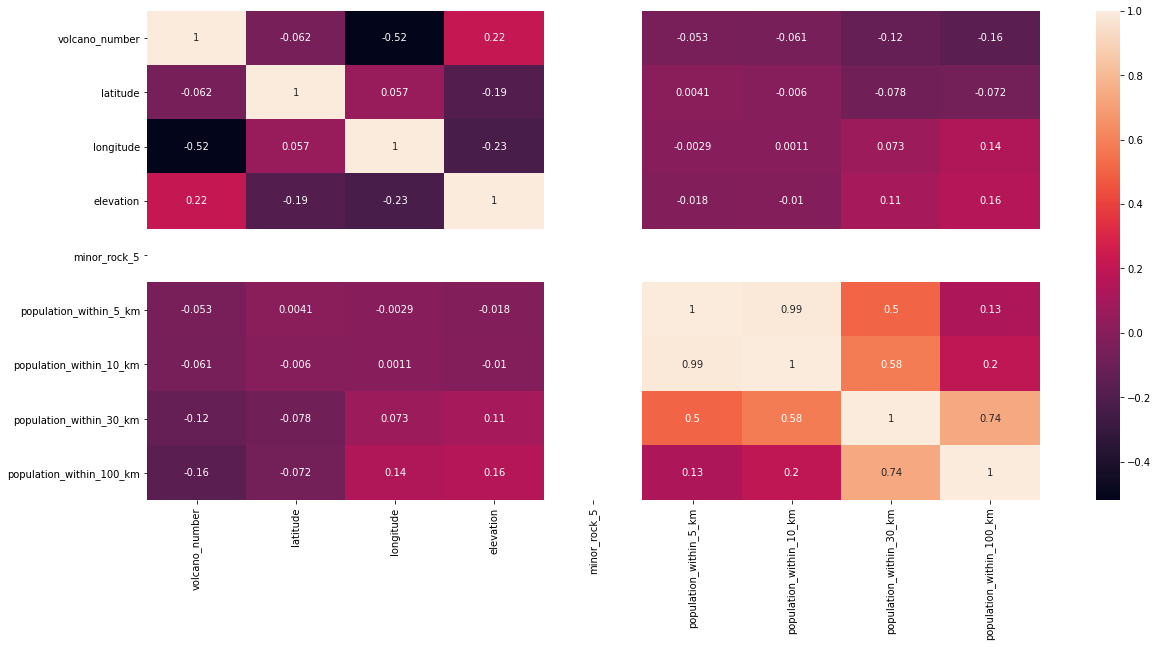

In [ ]:
plt.figure(figsize=(20,9))
sns.heatmap(volcano_data.corr(), annot=True)

## Exploratory Data Analysis

## Reasearch Question 1: Which country has the most occurence of volcano since 1883?

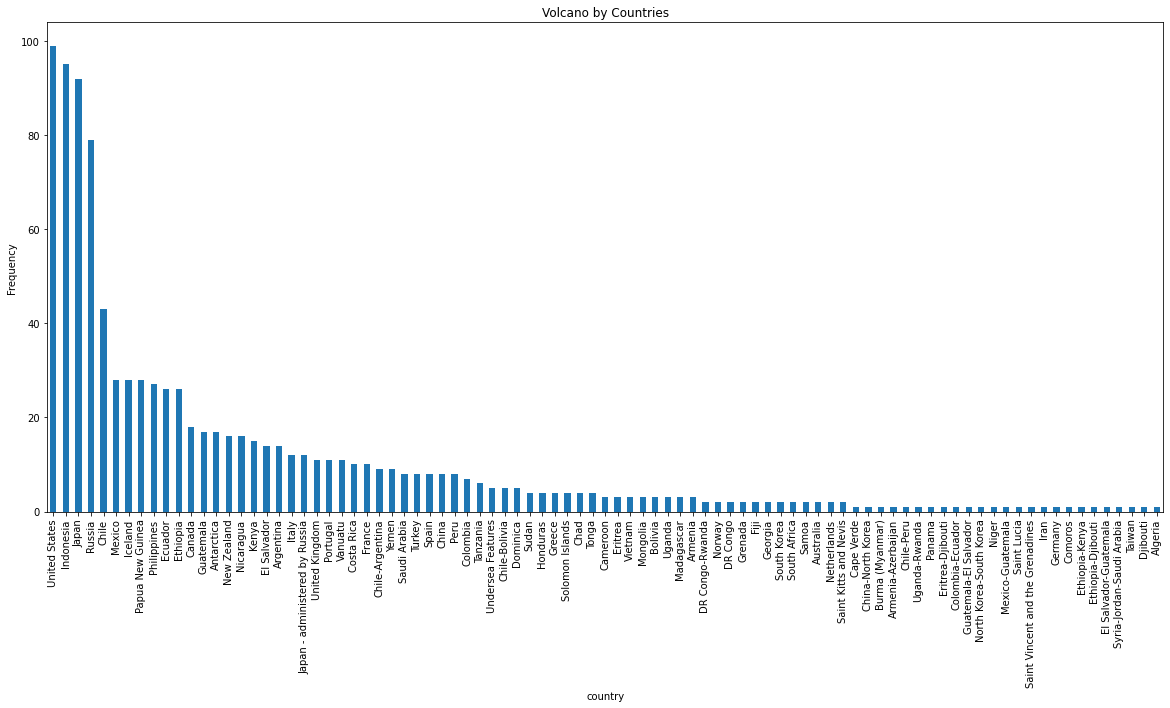

In [ ]:
country_volcano= volcano_data.groupby('country')['country'].count()
#print(type_volcano.sort_values(ascending=False))
plt.figure(figsize=(20,9))
country_volcano.sort_values(ascending=False).plot(kind='bar')

plt.title('Volcano by Countries')
plt.ylabel('Frequency')

plt.show()

United States has the most occurences of Volcano disaster with 99 occurences, followed by indonesia. The least country is Algeria

## Research Question 2: which type of volcano is the most occurence?

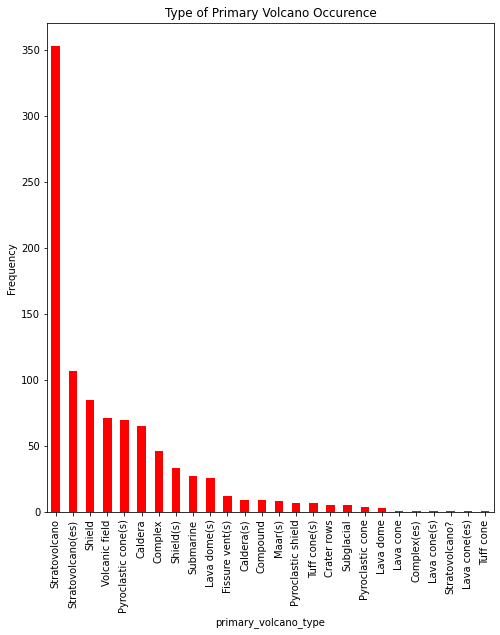

In [17]:
type_volcano= volcano_data.groupby('primary_volcano_type')['primary_volcano_type'].count()
#print(type_volcano.sort_values(ascending=False))
plt.figure(figsize=(8,9))
type_volcano.sort_values(ascending=False).plot(kind='bar', color="red")


plt.title('Type of Primary Volcano Occurence')
plt.ylabel('Frequency')
plt.show()


The highest volcano type that has ever happened is "Stratovolcano" with a count of 353

## Research Question 3: Find which region volcano eruption occured most?

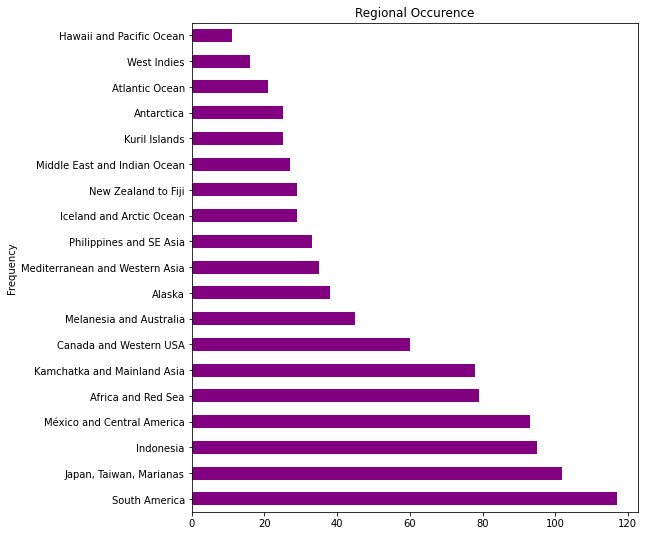

In [18]:
region_volcano= volcano_data.groupby('region')['region'].count()
#print(type_volcano.sort_values(ascending=False))
plt.figure(figsize=(8,9))
region_volcano.sort_values(ascending=False).plot(kind='barh', color="purple")


plt.title('Regional Occurence')
plt.ylabel('Frequency')
plt.show()


The highest sub region with most volcano is south America



## Research Question 4: What evidence category is the most common?

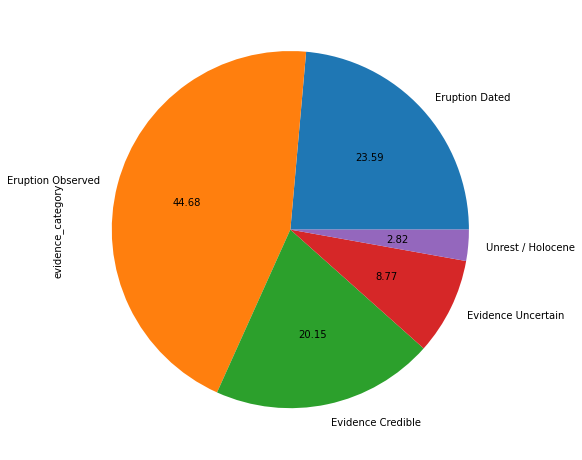

In [19]:
evidence_volcano= volcano_data.groupby('evidence_category')['evidence_category'].count()
#print(type_volcano.sort_values(ascending=False))
plt.figure(figsize=(8,9))
evidence_volcano.plot(kind='pie', autopct='%.2f')
plt.show()

# Research Question 5: What subregion does the volcano occur most?

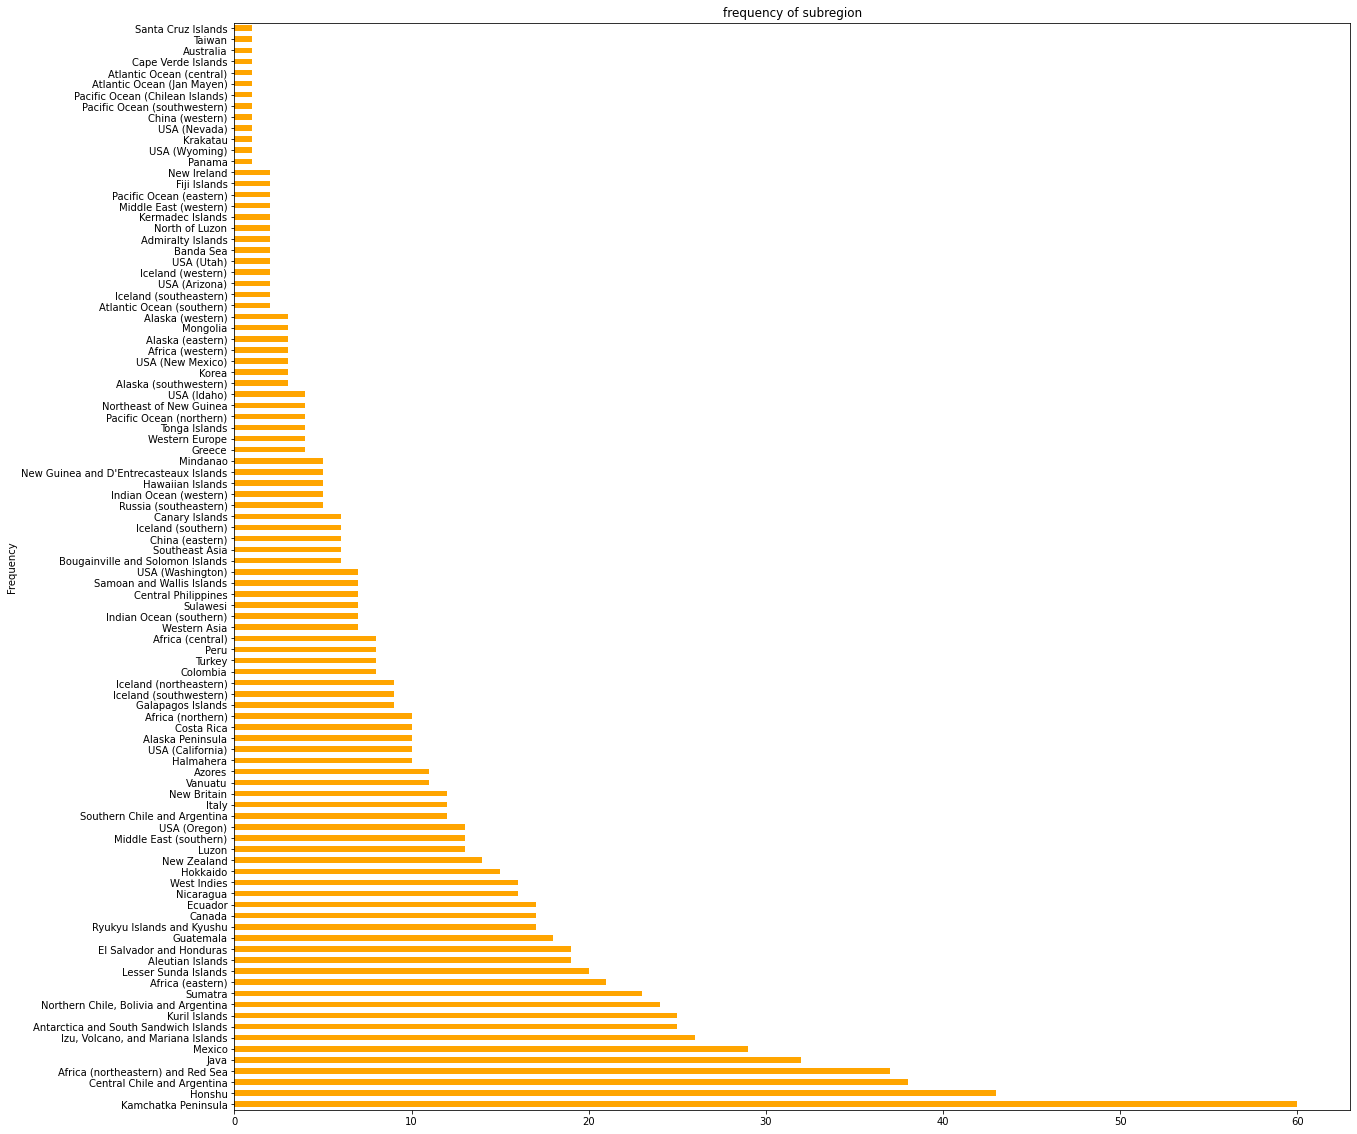

In [ ]:
subregion_volcano= volcano_data.groupby('subregion')['subregion'].count()
#print(type_volcano.sort_values(ascending=False))
plt.figure(figsize=(20,20))
subregion_volcano.sort_values(ascending=False).plot(kind='barh', color="orange")


plt.title('frequency of subregion')
plt.ylabel('Frequency')
plt.show()

Kamchatka peninsula has the highest occurence of volcano in the subregion 

## Research Question 6: Find out most volcano eruption country in each region and subregion.

In [ ]:
crs_volcano= volcano_data.groupby(['region','subregion','country'])['country'].count()
print(crs_volcano.sort_values(ascending= False))
#plt.figure(figsize=(50,50))
#crs_volcano.sort_values(ascending=False).plot(kind='barh', color="orange")


#plt.title('Categorization of country, region and subregion')
#plt.ylabel('Frequency')

region                       subregion                          country              
Kamchatka and Mainland Asia  Kamchatka Peninsula                Russia                   60
Japan, Taiwan, Marianas      Honshu                             Japan                    43
Indonesia                    Java                               Indonesia                32
México and Central America   Mexico                             Mexico                   28
Africa and Red Sea           Africa (northeastern) and Red Sea  Ethiopia                 26
                                                                                         ..
México and Central America   El Salvador and Honduras           El Salvador-Guatemala     1
                             Guatemala                          Guatemala-El Salvador     1
                             Mexico                             Mexico-Guatemala          1
Kamchatka and Mainland Asia  China (eastern)                    China-North Korea     

Russia, Japan,Indonesia, mexico, Ethopia are the most occuring countries in their region

### Working with Numeric columns

In [21]:
# Working with numeric data
num = volcano_data.select_dtypes(np.number)
num.head()
numa = volcano_data[['elevation','population_within_5_km','population_within_10_km','population_within_30_km','population_within_100_km']]

Check for Outliers in each column 

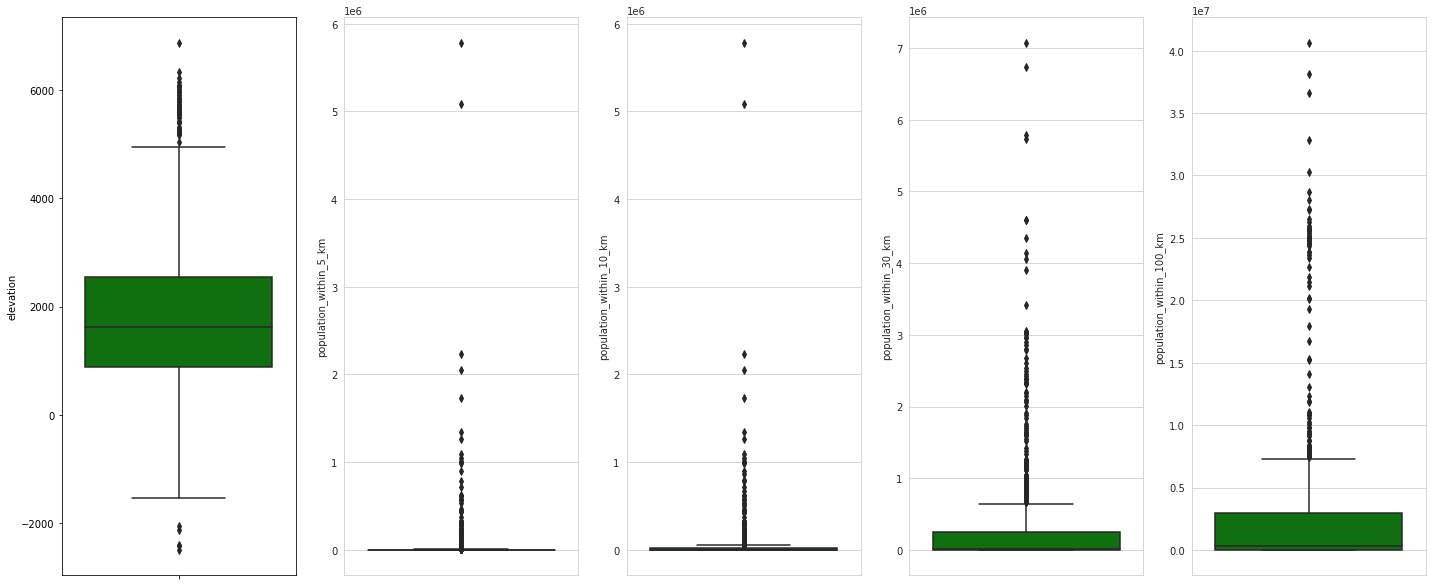

In [22]:
l = numa.columns.values
number_of_columns=5
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(20,40))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y= numa[l[i]],color='green')
    plt.tight_layout()

The numerical varables has a lot of outliers but it is not unsual, this is because the numbers are possible

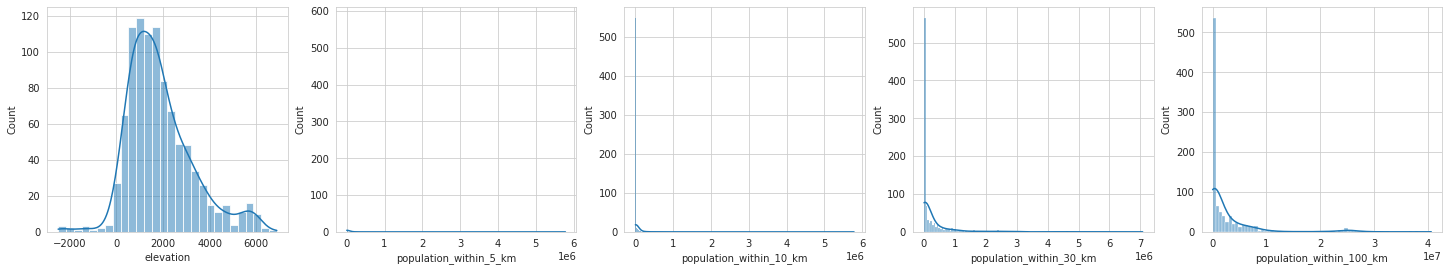

In [ ]:
plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.histplot(numa[l[i]],kde=True)

In [ ]:
numa.describe().T

,count,mean,std,min,25%,50%,75%,max
elevation,958.0,1.867027e+03,1.401546e+03,-2500.0,881.00,1622.5,2548.25,6879.0
population_within_5_km,958.0,4.786046e+04,2.986690e+05,0.0,0.00,295.0,4642.00,5783287.0
population_within_10_km,958.0,6.121775e+04,3.023860e+05,0.0,23.25,1633.5,20730.25,5783287.0
population_within_30_km,958.0,3.040444e+05,7.354221e+05,0.0,408.00,13918.0,256521.00,7073814.0
population_within_100_km,958.0,2.730174e+06,5.690981e+06,0.0,11397.75,354646.0,2981102.25,40640105.0


## Research Question 7: Find the maximum height of volcano(elevation) per subregion. I used median because the data has outliers


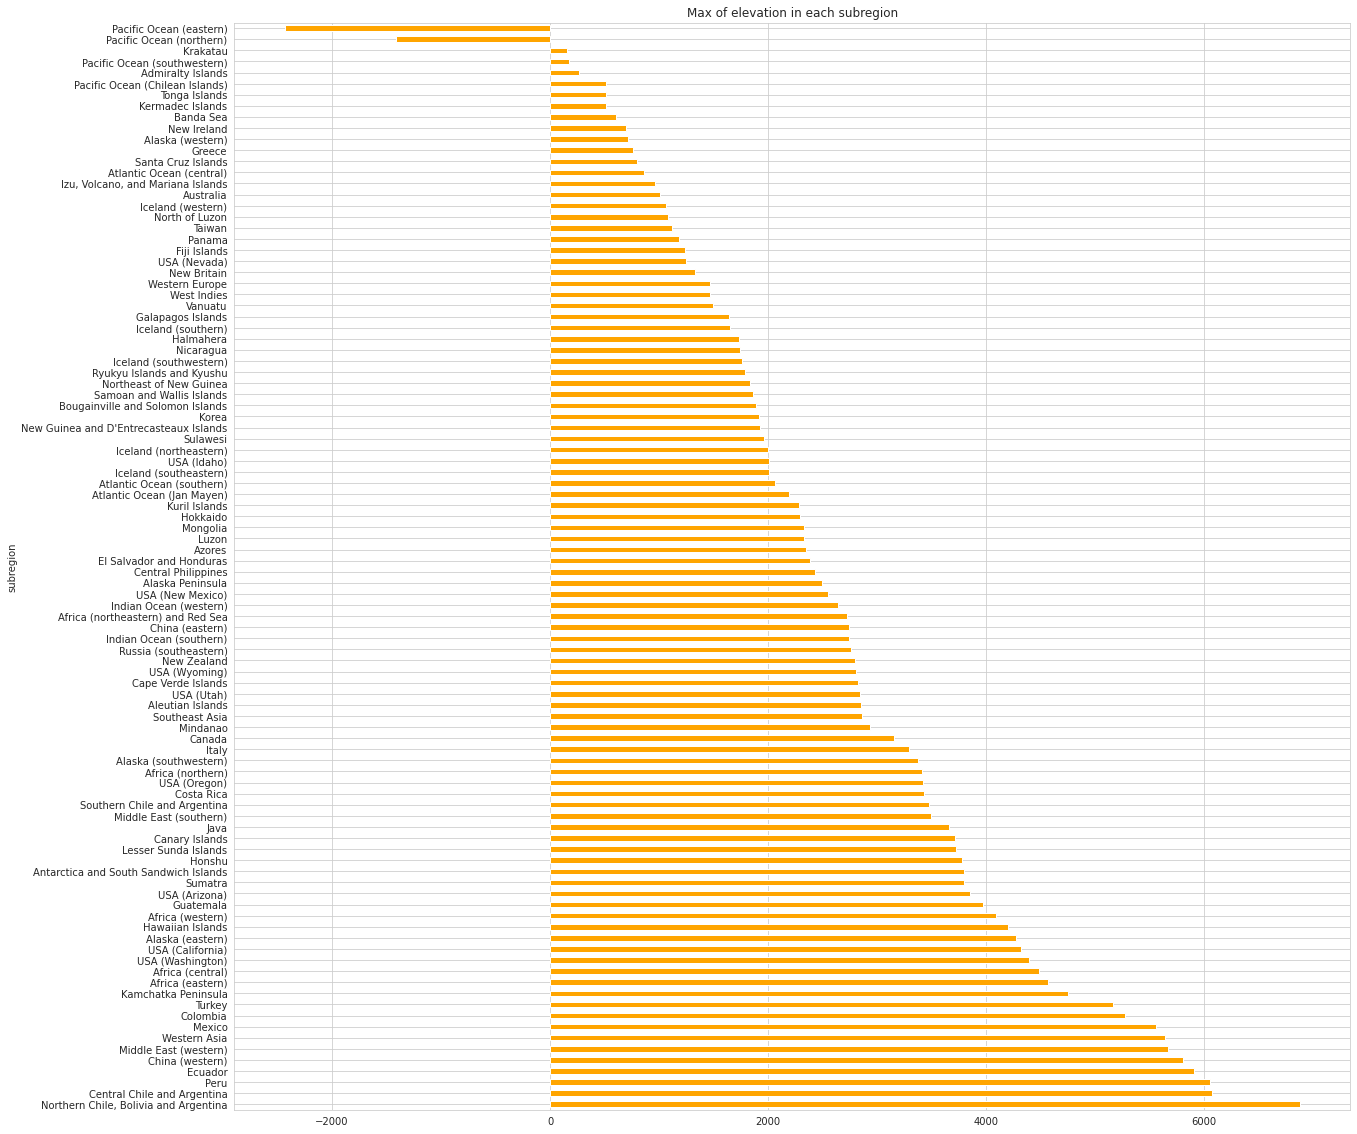

In [23]:
subelevation_max= volcano_data.groupby('subregion')['elevation'].max()
#print(type_volcano.sort_values(ascending=False))
plt.figure(figsize=(20,20))
subelevation_max.sort_values(ascending=False).plot(kind='barh', color="orange")


plt.title('Max of elevation in each subregion')

plt.show()

Northern Chille, Bolivia and Argentina has the highest volcano height in the given range of years

# Eruption data

In [ ]:
eruption_data.head() #print the first five rows

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


In [ ]:
eruption_data.shape

(11178, 15)

In [ ]:
eruption_data.isnull().sum() #check for missing values

volcano_number               0
volcano_name                 0
eruption_number              0
eruption_category            0
area_of_activity          6484
vei                       2906
start_year                   1
start_month                193
start_day                  196
evidence_method_dating    1280
end_year                  6846
end_month                 6849
end_day                   6852
latitude                     0
longitude                    0
dtype: int64

This data has columns with a lot of missing values

Find percentage of missing values and plot

In [ ]:
#find the percentage of missing value for each column
mask = eruption_data.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis=1,join='outer',
keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False,
inplace=True)
missing_data

,count_missing,perc_missing
end_day,6852,61.298980
end_month,6849,61.272142
end_year,6846,61.245303
area_of_activity,6484,58.006799
vei,2906,25.997495
evidence_method_dating,1280,11.451065
start_day,196,1.753444
start_month,193,1.726606
start_year,1,0.008946
volcano_number,0,0.000000


Find the valuecount of startday,endday, startmonth, endmonth, startyear, endyear

In [ ]:
print(eruption_data['start_day'].value_counts())
print(eruption_data['start_month'].value_counts())
print(eruption_data['start_year'].value_counts())
print(eruption_data['end_day'].value_counts())
print(eruption_data['end_month'].value_counts())
print(eruption_data['end_year'].value_counts())

0.0     5851
16.0     451
2.0      292
1.0      249
15.0     242
5.0      183
4.0      166
25.0     164
18.0     160
11.0     157
26.0     156
8.0      151
29.0     150
3.0      149
12.0     147
27.0     146
9.0      144
10.0     144
21.0     142
13.0     142
7.0      142
23.0     139
24.0     138
14.0     138
17.0     138
28.0     136
6.0      132
22.0     132
19.0     132
30.0     125
20.0     124
31.0     120
Name: start_day, dtype: int64
0.0     5033
7.0      633
1.0      567
3.0      508
12.0     495
2.0      494
5.0      489
11.0     483
4.0      482
6.0      467
8.0      459
9.0      452
10.0     423
Name: start_month, dtype: int64
 2004.0    54
 2008.0    53
 1986.0    51
 1973.0    51
 2002.0    51
           ..
-3541.0     1
 1433.0     1
-6270.0     1
-7320.0     1
-5830.0     1
Name: start_year, Length: 1694, dtype: int64
0.0     733
16.0    467
26.0    153
15.0    150
2.0     141
1.0     130
17.0    129
28.0    127
5.0     122
30.0    120
18.0    117
25.0    115
13.0    11

Find the average startday,endday, startmonth, endmonth, startyear, endyear

In [ ]:
print(round(eruption_data['start_day'].mean(), 1))
print(round(eruption_data['start_month'].mean(), 1))
print(round(eruption_data['start_year'].mean(), 1))
print(round(eruption_data['end_day'].mean(), 1))
print(round(eruption_data['end_month'].mean(), 1))
print(round(eruption_data['end_year'].mean(), 1))

7.0
3.5
622.8
13.3
6.2
1917.3


Make a copy of the eruption data and drop the rows containing 0 in the end day column

In [ ]:
N_eruption = eruption_data.copy()
N_eruption.shape

(11178, 15)

In [ ]:
N_eruption.dropna(subset=['end_day','start_day'], inplace = True)

In [ ]:
N_eruption.isnull().sum()

volcano_number               0
volcano_name                 0
eruption_number              0
eruption_category            0
area_of_activity          2267
vei                        146
start_year                   0
start_month                  0
start_day                    0
evidence_method_dating     305
end_year                     0
end_month                    0
end_day                      0
latitude                     0
longitude                    0
dtype: int64

In [ ]:
N_eruption.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


convert date columns to intergers

In [ ]:
N_eruption['start_day'] = N_eruption['start_day'].apply(np.int64)
N_eruption['start_month'] = N_eruption['start_month'].apply(np.int64)
N_eruption['start_year'] = N_eruption['start_year'].apply(np.int64)
N_eruption['end_day'] = N_eruption['end_day'].apply(np.int64)
N_eruption['end_month'] = N_eruption['end_month'].apply(np.int64)
N_eruption['end_year'] = N_eruption['end_year'].apply(np.int64)

combine the start_day,start_month and start_year column into one and name it start_date. Do so for end variables too.

In [ ]:
N_eruption['start_date'] = N_eruption['start_day'].map(str) + '-' + N_eruption['start_month'].map(str) + '-' + N_eruption['start_year'].map(str)
N_eruption['end_date'] = N_eruption['end_day'].map(str) + '-' + N_eruption['end_month'].map(str) + '-' + N_eruption['end_year'].map(str)
print(N_eruption.head(2))



   volcano_number volcano_name  ...  start_date   end_date
0          266030      Soputan  ...   23-3-2020   2-4-2020
1          343100   San Miguel  ...   22-2-2020  22-2-2020

[2 rows x 17 columns]


Make a line plot

start_day
0     550
16    327
1     167
5     146
15    145
2     142
26    132
25    128
11    124
4     122
29    120
7     116
21    116
27    116
17    114
3     113
8     113
18    112
9     112
19    112
10    112
23    110
13    109
12    108
28    105
24    105
14    102
22    101
6      98
30     96
20     94
31     59
Name: start_day, dtype: int64


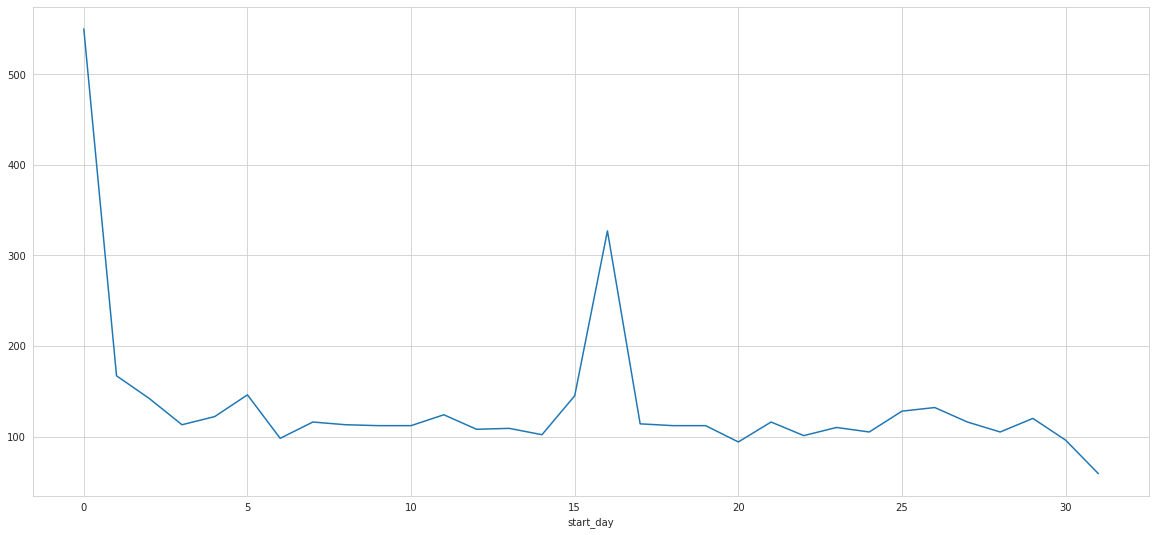

In [ ]:
plt.figure(figsize = (20,9))
start_day = N_eruption.groupby('start_day')['start_day'].count()
print(start_day.sort_values(ascending=False))
start_day.plot(kind="line")

This has just confirmed our findings above that the majority of eruption started on the 16th day of the month. zero(0) indicates missing values

let us plot for end day too

end_day
0     733
16    467
26    153
15    150
2     141
1     130
17    129
28    127
5     122
30    120
18    117
25    115
13    113
27    108
24    105
14    104
12    104
4     102
19     99
9      98
10     92
8      92
20     87
21     86
6      85
23     85
29     82
7      80
22     80
31     77
11     74
3      69
Name: end_day, dtype: int64


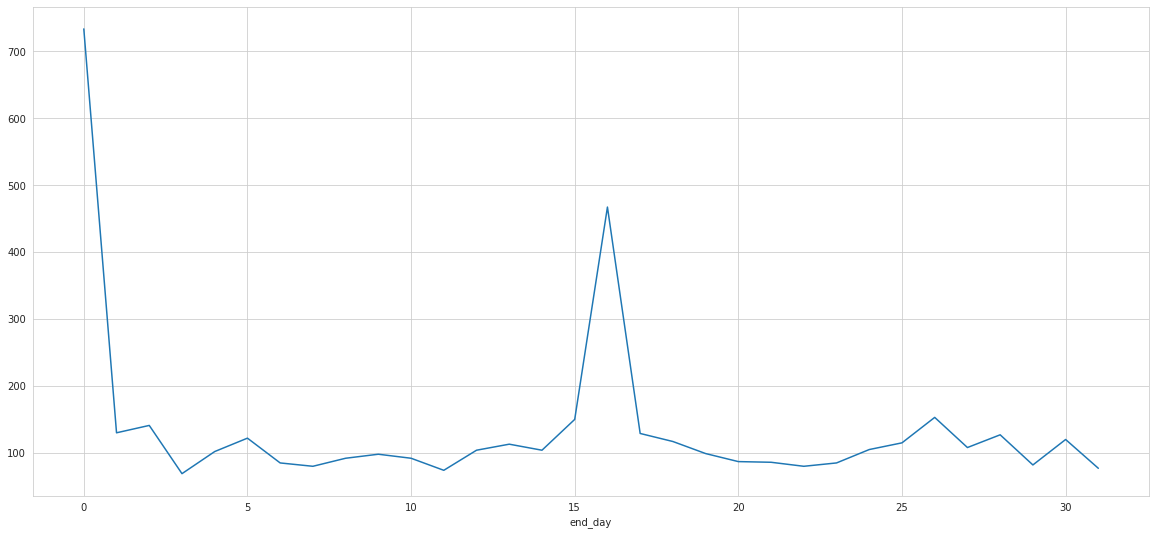

In [ ]:
plt.figure(figsize = (20,9))
end_day = N_eruption.groupby('end_day')['end_day'].count()
print(end_day.sort_values(ascending=False))
end_day.plot(kind="line")

This has just confirmed our findings above that the majority of eruption also ended on the 16th day of the month. zero(0) indicates missing values

In [ ]:
volcano_data.shape

(958, 26)

Merge the eruption_data with volcano_data on volcano_number

In [ ]:
merged = pd.merge(volcano_data, eruption_data,on='volcano_number',how='inner')
merged.shape


(9559, 40)

Let us do some analysis on our merged data

In [ ]:
merged.isnull().sum()

volcano_number                 0
volcano_name_x                 0
primary_volcano_type           0
last_eruption_year             0
country                        0
region                         0
subregion                      0
latitude_x                     0
longitude_x                    0
elevation                      0
tectonic_settings              0
evidence_category              0
major_rock_1                   0
major_rock_2                2103
major_rock_3                6053
major_rock_4                8427
major_rock_5                9203
minor_rock_1                6389
minor_rock_2                8110
minor_rock_3                9177
minor_rock_4                9470
minor_rock_5                9559
population_within_5_km         0
population_within_10_km        0
population_within_30_km        0
population_within_100_km       0
volcano_name_y                 0
eruption_number                0
eruption_category              0
area_of_activity            5212
vei       

Make a copy and drop all rows where start day is null

In [ ]:
N_merged = merged.copy()
N_merged.shape

(9559, 40)

In [ ]:
N_merged.dropna(subset=['start_day'], inplace = True)


In [ ]:
N_merged.shape

(9385, 40)

Count the most occurence start_day for each country

country
Ethiopia-Djibouti    31.000000
South Africa         20.000000
Colombia-Ecuador     17.000000
Grenada              15.600000
Cape Verde           12.416667
                       ...    
Netherlands           0.000000
Mongolia              0.000000
Madagascar            0.000000
Germany               0.000000
Iran                  0.000000
Name: start_day, Length: 76, dtype: float64


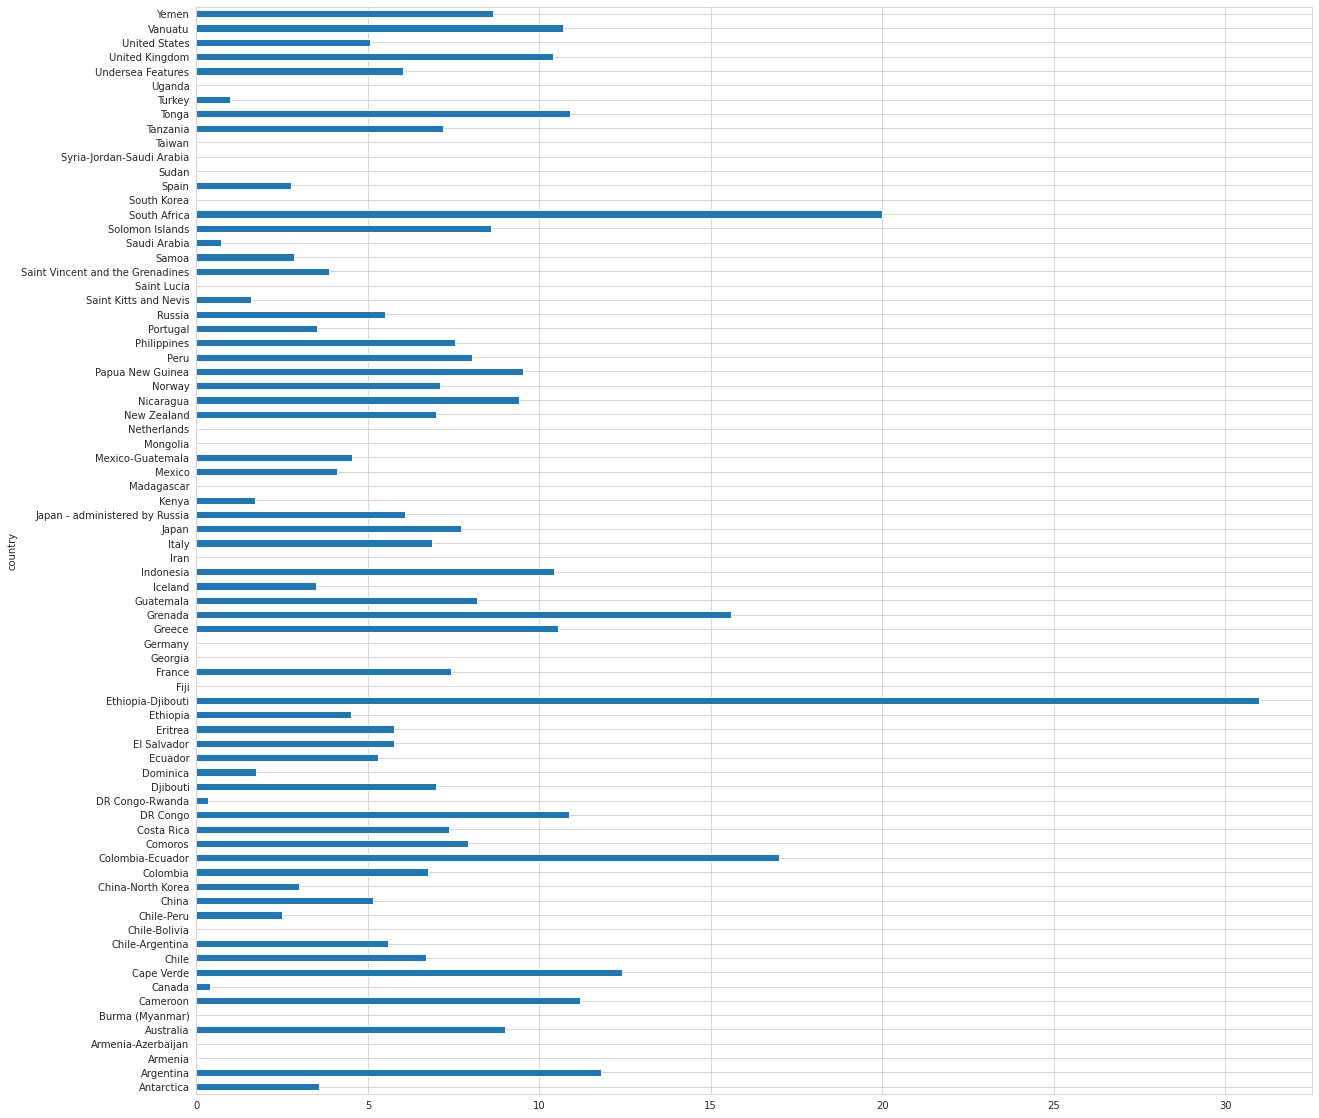

In [ ]:
#group by country on start day and count
plt.figure(figsize = (20,20))
country_day = N_merged.groupby('country')['start_day'].mean()
print(country_day .sort_values(ascending=False))
country_day.plot(kind="barh")

The figure shows that USA with the highest number of volcano for the given years on average, the eruption starts on the 5th day of the month.

# events_data

In [ ]:
event_data.head()


,volcano_number,volcano_name,eruption_number,eruption_start_year,event_number,event_type,event_remarks,event_date_year,event_date_month,event_date_day
0,210020,Chaine des Puys,10011,-4040,100001,Explosion,NaN,NaN,NaN,NaN
1,210020,Chaine des Puys,10011,-4040,100002,Scoria,NaN,NaN,NaN,NaN
2,210020,Chaine des Puys,10011,-4040,100003,Pyroclastic flow,NaN,NaN,NaN,NaN
3,210020,Chaine des Puys,10011,-4040,100004,Lava flow(s),NaN,NaN,NaN,NaN
4,210020,Chaine des Puys,10011,-4040,100005,Cinder cone formation,NaN,NaN,NaN,NaN


In [ ]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41322 entries, 0 to 41321
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volcano_number       41322 non-null  int64  
 1   volcano_name         41322 non-null  object 
 2   eruption_number      41322 non-null  int64  
 3   eruption_start_year  41322 non-null  int64  
 4   event_number         41322 non-null  int64  
 5   event_type           41322 non-null  object 
 6   event_remarks        4880 non-null   object 
 7   event_date_year      10007 non-null  float64
 8   event_date_month     7132 non-null   float64
 9   event_date_day       5923 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.2+ MB


In [ ]:
event_data.describe().T

,count,mean,std,min,25%,50%,75%,max
volcano_number,41322.0,296428.862616,48713.188142,210010.0,263250.00,284210.0,342090.00,600000.0
eruption_number,41322.0,15428.928029,3190.705491,10001.0,12693.25,15334.5,18081.75,22352.0
eruption_start_year,41322.0,850.534679,2298.526358,-11345.0,1257.00,1884.0,1968.00,2020.0
event_number,41322.0,127402.193819,15453.718318,100001.0,113978.25,127832.5,141701.75,153202.0
event_date_year,10007.0,1365.646947,1707.332054,-9650.0,1773.00,1912.0,1977.00,2020.0
event_date_month,7132.0,6.382081,3.522029,1.0,3.00,6.0,9.00,12.0
event_date_day,5923.0,15.461759,8.959910,1.0,8.00,15.0,23.00,31.0


In [ ]:
print(event_data['event_type'].value_counts())

VEI (Explosivity Index)                9194
Explosion                              7825
Ash                                    4110
Lava flow(s)                           3195
Earthquakes (undefined)                1777
Phreatic activity                      1508
Pyroclastic flow                       1399
Property damage                        1079
Lahar or mudflow                        785
Pumice                                  716
Scoria                                  682
Lava dome formation                     668
Blocks                                  632
Lapilli                                 616
Tephra                                  611
Volcanic tremor                         604
Fatalities                              585
Cinder cone formation                   512
Evacuations                             497
Bombs                                   423
Loud audible noises                     403
Lava fountains                          323
Eruption cloud                  

In [ ]:
event_data.isnull().sum()

volcano_number             0
volcano_name               0
eruption_number            0
eruption_start_year        0
event_number               0
event_type                 0
event_remarks          36442
event_date_year        31315
event_date_month       34190
event_date_day         35399
dtype: int64

## We want to make use of the event type in event data, hence i would be merging it with the volcano data

In [ ]:
volcano_event = pd.merge(volcano_data, event_data,on='volcano_number',how='inner')
volcano_event.shape

(36075, 35)

What is the event_type common to each region?

region                       event_type             
Japan, Taiwan, Marianas      VEI (Explosivity Index)    1360
Indonesia                    VEI (Explosivity Index)    1261
Japan, Taiwan, Marianas      Explosion                  1084
Indonesia                    Explosion                   998
South America                VEI (Explosivity Index)     869
México and Central America   VEI (Explosivity Index)     765
South America                Explosion                   743
Japan, Taiwan, Marianas      Ash                         720
México and Central America   Explosion                   656
Kamchatka and Mainland Asia  Explosion                   630
Name: event_type, dtype: int64


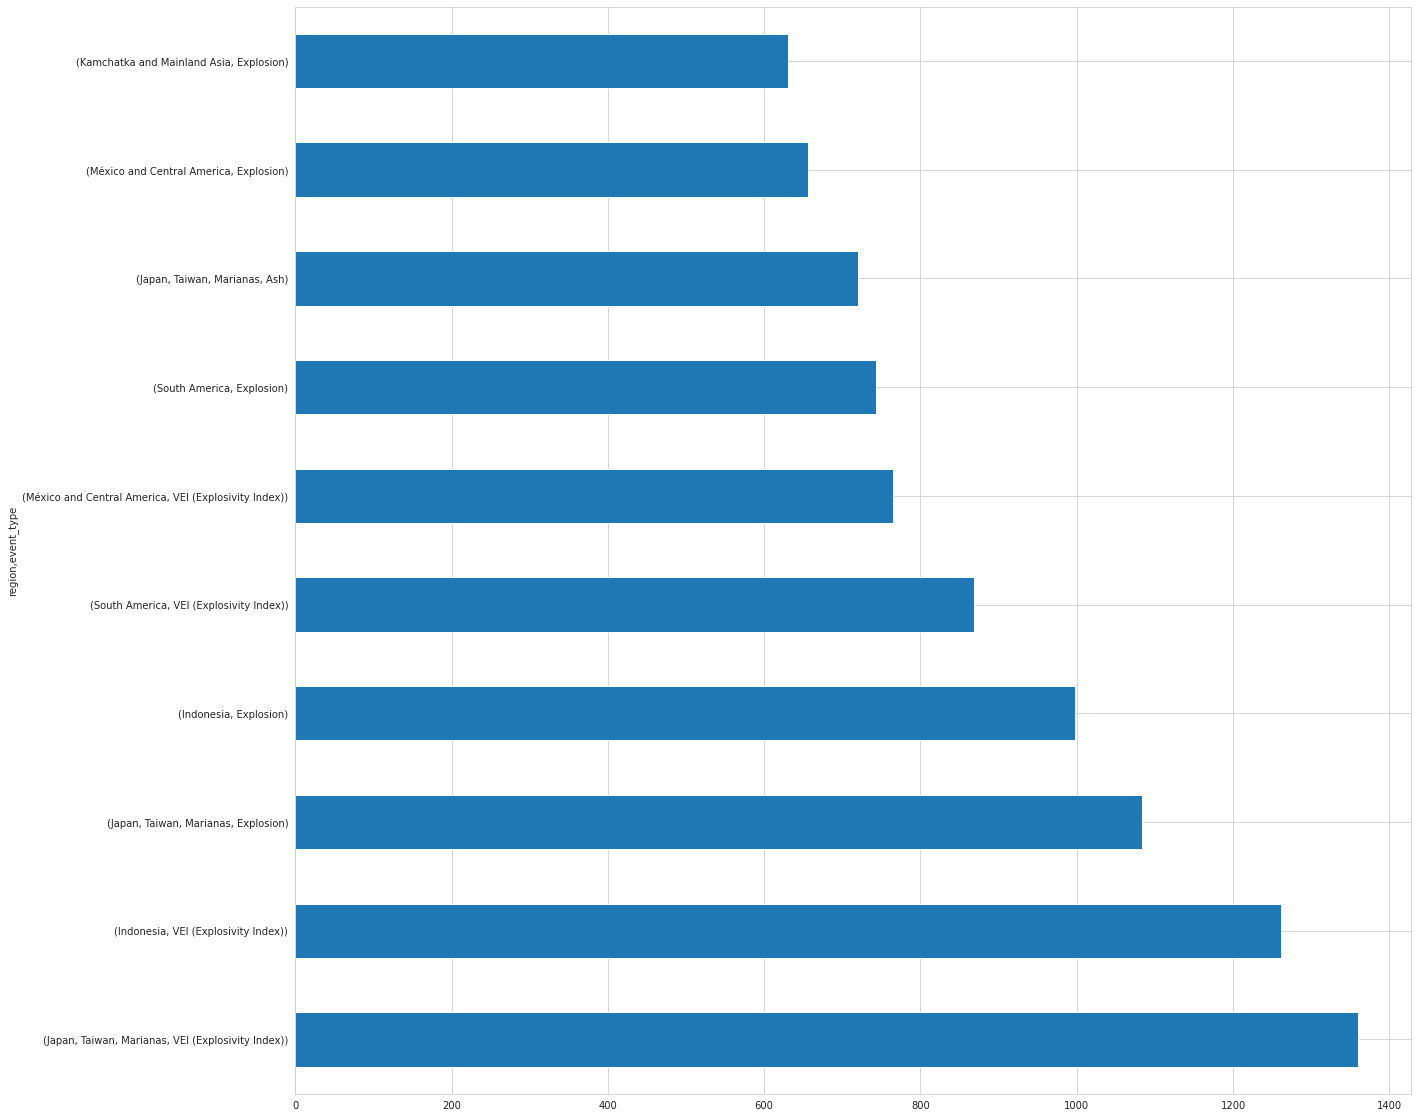

In [ ]:
#group by region on event_type and count
plt.figure(figsize = (20,20))
region_event_type  =volcano_event.groupby(['region','event_type'])['event_type'].count()
sorted = region_event_type .sort_values(ascending=False).head(10)
print(sorted)
sorted.plot(kind="barh")

South America which has the highest count of volcano regionally has VEI as the most common event_type.